# Bootstrapping

## Oct 29, 2022

### data:  WAGE1 from Wooldridge

#####  Model: log(wage) = β0 + β1educ + β2exper + β3tenure + β4female + β5married + β6numdep

In [125]:
#import packages

import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statistics
import statsmodels.formula.api as smf

#import data
import wooldridge as woo 
wage1 = woo.data('WAGE1') 
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [6]:
reg = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', wage1)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     58.54
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           3.15e-55
Time:                        22:53:01   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             569.0
Df Residuals:                     519   BIC:                             598.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4894      0.109      4.492      0.000       0.275       0.703
educ           0.0839      0.007     11.534      0.000       0.070       0.098
exper          0.0031      0.002      1.830      0.068      -0.000       0.007
tenure         0.0169      0.003      5.700      0.000       0.011       0.023
female        -0.2856      0.037     -7.648      0.000      -0.359      -0.212
married        0.1256      0.041      3.046      0.002       0.045       0.207
numdep         0.0003      0.015      0.018      0.986      -0.030       0.030
==============================================================================
Omnibus:                       11.872   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.133
Skew:                           0.071   Prob(JB):                     2.58e-05
Kurtosis:                       3.972   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

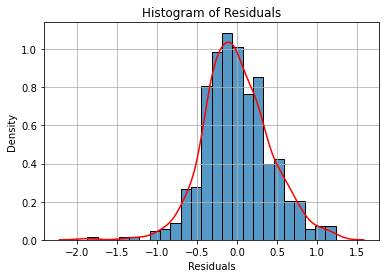

In [9]:
sns.kdeplot(results.resid, color = "red")
sns.histplot(results.resid, stat = "density")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()

### Jarque Bera Test

In [7]:
stats.jarque_bera(results.resid)

Jarque_beraResult(statistic=21.133269206920765, pvalue=2.576136668841489e-05)

##### The Jarque-Bera test showed a probability value of 2.58e-05 so that we are confident to reject the null hypothesis that the JB value equals 0. Therefore we can conclude that the the data does not follow a normal distribution.

### Fitted values, observed values, prediction interval, and confidence interval

In [18]:
# get xrange
xrange_educ = np.linspace(wage1.educ.min(), wage1.educ.max(), 200)
xrange_exper = np.linspace(wage1.exper.min(), wage1.exper.max(), 200)
xrange_tenure = np.linspace(wage1.tenure.min(), wage1.tenure.max(), 200)
xrange_female = np.linspace(wage1.female.min(), wage1.female.max(), 200)
xrange_married = np.linspace(wage1.married.min(), wage1.married.max(), 200)
xrange_numdep = np.linspace(wage1.numdep.min(), wage1.numdep.max(), 200)

# Put in format that works with get_predictions()
# new_data = pd.DataFrame(xrange, columns = ["exper"])
new_data = pd.DataFrame({'educ':xrange_educ,'exper':xrange_exper,'tenure':xrange_tenure,'female':xrange_female,'married':xrange_married,'numdep':xrange_numdep}, columns = ('educ','exper','tenure','female','married','numdep'))
# new_data = pd.DataFrame({xrange_educ,xrange_exper,xrange_tenure,xrange_female,xrange_married,xrange_numdep}, columns = ('educ','exper','tenure','female','married','numdep'))


In [19]:
# Generate predictions over range
predictions = results.get_prediction(new_data)

# Generate table with intervals for each x
predictions = predictions.summary_frame(alpha=0.05)

predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.492490,0.108152,0.280019,0.704960,-0.345946,1.330926
1,0.503805,0.107172,0.293261,0.714349,-0.334145,1.341754
2,0.515119,0.106195,0.306495,0.723744,-0.322350,1.352589
3,0.526434,0.105221,0.319723,0.733145,-0.310561,1.363429
4,0.537749,0.104251,0.332944,0.742554,-0.298777,1.374275
...,...,...,...,...,...,...
195,2.698880,0.142946,2.418056,2.979704,1.840572,3.557188
196,2.710195,0.144003,2.427294,2.993096,1.851205,3.569185
197,2.721510,0.145062,2.436529,3.006491,1.861833,3.581187
198,2.732825,0.146122,2.445761,3.019888,1.872455,3.593195


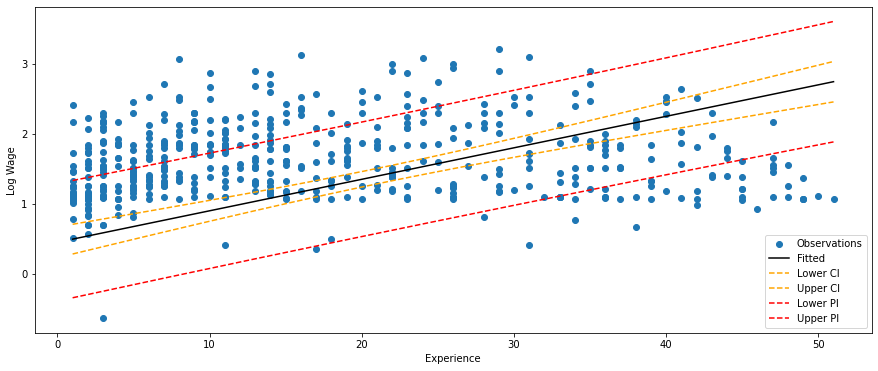

In [20]:
plt.figure(figsize = (15, 6))
plt.scatter(wage1.exper, np.log(wage1.wage))
plt.plot(xrange_exper, predictions["mean"], color = "black")

plt.xlabel("Experience")
plt.ylabel("Log Wage")

# confidence Intervals
plt.plot(xrange_exper, predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange_exper, predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange_exper, predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange_exper, predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

### Bootstrapping Standard Errors
### Determine whether β2 is different from 0.

In [57]:
# How many observations we need to draw from the dataset wage1?
wage1.shape

(526, 24)

In [124]:
# build dataframe to store sample statistics
coefs = pd.DataFrame(columns = ['B0','B1','B2','B3','B4','B5','B6'])

# we will generate 1000 bootstrap samples
for i in range(1000):
    
    # sample from the data with replacement N times
    sample = wage1.sample(wage1.shape[0] ,replace = True)
    
    # fit model on bootstrap sample
    results_c = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', sample).fit()
    
    # pull out the bootstrap sample statistics
    b0,b1,b2,b3,b4,b5,b6 = results_c.params
    
    # store the bootstrap sample statistics for later use
    coefs = coefs.append({'B0':b0, 'B2':b2}, ignore_index = True)

# below I calculate the percentile bootstraps for a 95% confidence interval

# For B0
# the 97.5 percentile of the bootstrap sample statistics
# b0_u = coefs['B0'].quantile(.975)
# the 2.5 percentile of the bootstrap sample statistics
# b0_l = coefs['B0'].quantile(.025)

# For B2
b2_u = coefs['B2'].quantile(.975)
b2_l = coefs['B2'].quantile(.025)

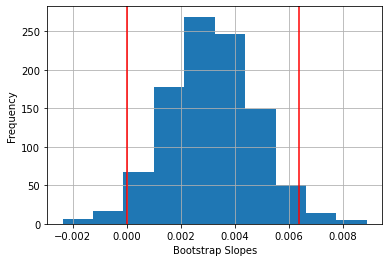

In [121]:
coefs.B2.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.axvline(b2_u, color = "red")
plt.axvline(b2_l, color = "red")

In [116]:
# calculate the bootstrap standard error over the bootstrap statsitics for beta1
se_bt = coefs.B2.std(ddof = 1)
se_bt

0.001682724430417346

In [117]:
# calculate the basic CI
[b2-1.96*se_bt, b2+1.96*se_bt]

[0.0006934787401550171, 0.007289758507391014]

##### B2 is different from 0 because the confidence interval does not include 0.

### Compare 5 different possible sub-models using Mallow’s CP. Which yielded the best result?

In [70]:
from RegscorePy import mallow
import itertools

reg_d = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', wage1)
results_d = reg.fit()

y = np.log(wage1['wage'])
y_pred=results_d.fittedvalues


In [ ]:
# You need to run each sub regression individually, and get the score for each subset
# Using subset size =1
mr_sub = smf.ols(formula='np.log(wage) ~ educ + exper', data=wage1)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 7 # number of parameters in orginal model (includes y-intercept)
p = 2 # number of parameters in the subset model (includes y-intercept)

mallow.mallow(y, y_pred,y_sub, k, p)

In [71]:
subdat = wage1[['educ', 'exper', 'tenure','female', 'married', 'numdep']].copy()

In [82]:
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])

k = 7 # number of parameters in orginal model (includes y-intercept)

for L in range(1, 5):
    for subset in itertools.combinations(subdat, 4):  # find sub-models with 4 variables
        
        # join the strings in the data together
        formula1 = 'np.log(wage)~'+'+'.join(subset)
        
        # get the cp
        results_cp = smf.ols(formula=formula1, data = wage1).fit()
        y_sub = results_cp.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        
        # add to the dataframe
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)

/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWa

/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_70760/3718539871.py:19: FutureWa

In [83]:
storage_cp.sort_values(by = "CP")

,Variables,CP
36,"(educ, tenure, female, married)",6.465083
21,"(educ, tenure, female, married)",6.465083
51,"(educ, tenure, female, married)",6.465083
6,"(educ, tenure, female, married)",6.465083
30,"(educ, exper, tenure, female)",12.869873
45,"(educ, exper, tenure, female)",12.869873
15,"(educ, exper, tenure, female)",12.869873
0,"(educ, exper, tenure, female)",12.869873
22,"(educ, tenure, female, numdep)",20.92839
52,"(educ, tenure, female, numdep)",20.92839


##### In all subsets with 4 variables, the model with 'educ', 'tenure', 'female', 'married' yields the smallest cp value. 

### K-fold cross validation  (K = 5)

In [86]:
from sklearn.model_selection import KFold # import KFold

# split the data into 5 subsets
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(wage1):
    print("TRAIN:", train_index, "TEST:", test_index)
    
# Model in a: np.log(wage) ~ educ + exper + tenure + female + married + numdep
# create a MSE list
rmse_a = []
for train_index, test_index in kf.split(wage1):
    # train data over training set
    results_A = smf.ols('np.log(wage) ~ educ + exper + tenure + female + married + numdep', wage1.iloc[train_index]).fit()
    
    # test over last split 
    s_a = ((np.log(wage1.iloc[test_index]["wage"]) - results_A.predict(wage1.iloc[test_index]))**2).mean()
    
    # append test metric
    rmse_a.append(np.sqrt(s_a))

rmse_a


TRAIN: [106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350

[0.5091690118187616,
 0.42983005249177225,
 0.38846441183834846,
 0.3402250157905725,
 0.41420555824965016]

In [88]:
# Model in (d): np.log(wage) ~ educ + tenure + female + married
rmse_d = []
for train_index, test_index in kf.split(wage1):
    # train data over training set
    results_D = smf.ols('np.log(wage) ~ educ + tenure + female + married', wage1.iloc[train_index]).fit()
    
    # test over last split 
    s_d = ((np.log(wage1.iloc[test_index]["wage"]) - results_D.predict(wage1.iloc[test_index]))**2).mean()
    
    # append test metric
    rmse_d.append(np.sqrt(s_d))

rmse_d

[0.5108100217011288,
 0.42878565107229905,
 0.3894540328781192,
 0.33930272172646253,
 0.4070984024578092]

In [98]:
print(np.mean(rmse_a))

print(np.mean(rmse_d))

0.416378810037821
0.41509016596716375


##### The model that I chose in part(d), 'np.log(wage) ~ educ + tenure + female + married',  yields a smaller RMSE, therefore it performs better. 

### data: VOTE1 from Wooldridge

##### Model: voteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗expendB.      

### Partial effects

In [30]:
# import data
vote1 = woo.data('VOTE1') 
vote1.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


In [33]:
reg2 = smf.ols('voteA ~ prtystrA + expendA + expendB + expendA*expendB', vote1)
results2 = reg2.fit()
results2.params

Intercept          32.117379
prtystrA            0.341940
expendA             0.038281
expendB            -0.031724
expendA:expendB    -0.000007
dtype: float64

In [35]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           6.77e-30
Time:                        23:55:03   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1174      4.591      6.995      0.000      23.054      41.181
prtystrA            0.3419      0.088      3.886      0.000       0.168       0.516
expendA             0.0383      0.005      7.718      0.000       0.028       0.048
expendB            -0.0317      0.005     -6.915      0.000      -0.041      -0.023
expendA:expendB -6.629e-06   7.19e-06     -0.923      0.358   -2.08e-05    7.56e-06
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.007
Skew:                          -0.004   Prob(JB):                        0.604
Kurtosis:                       2.626   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The expected sign for the interaction term expendA*expendB is not obvious because its confidence interval (-2.08e-05, 7.56e-06) includes 0. 

##### The partial effect of expendB on voteA, holding prtystrA and expendA fixed, is (-0.0317-6.629e-06*expendA) on voteA. 
##### The partial effect of expendA on voteA, holding prtystrA and expendB fixed, is (0.0383-6.629e-06*expendB) on voteA. 

### Interaction term

##### The interaction term is not statistically significant because the p value is 0.358, greater than the 0.05 significance level. Thus we can reject H0 that the expendA*expendB is significant. 

### Estimate a model that replaces the interaction with shareA, Candidate A’s percentage share of total campaign expenditures

In [54]:
reg3 = smf.ols('voteA ~ prtystrA + expendA + expendB + shareA', vote1)
results3 = reg3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           9.03e-73
Time:                        00:22:12   Log-Likelihood:                -557.66
No. Observations:                 173   AIC:                             1125.
Df Residuals:                     168   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1954      2.568      7.086      0.000      13.126      23.265
prtystrA       0.1573      0.050      3.165      0.002       0.059       0.255
expendA       -0.0067      0.003     -2.354      0.020      -0.012      -0.001
expendB        0.0043      0.003      1.637      0.104      -0.001       0.009
shareA         0.4944      0.025     19.535      0.000       0.444       0.544
==============================================================================
Omnibus:                       36.148   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.238
Skew:                           0.789   Prob(JB):                     4.24e-25
Kurtosis:                       6.616   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
from scipy.stats import pearsonr
corr, _ =pearsonr(vote1.expendA, vote1.shareA)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.462


In [53]:
corr, _ =pearsonr(vote1.expendB, vote1.shareA)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.461


##### It still does not make sense to hold both expendA and expendB, because the pearson correlation between expendA or expendB and shareA are pretty high, which indicates that they are highly correlated. Changing shareA will have an effect on expendA and expendB. 